In [1]:
# download the dataset
# %pip install -q tf_keras
# %pip install opencv-contrib-python
# %pip install --upgrade numpy

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Understanding the dataset

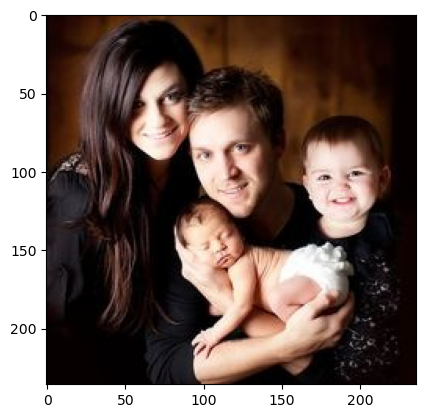

In [3]:
img1 = cv2.imread("faceDataset/images/00003517.jpg")
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
data = pd.read_csv('faceDataset/faces.csv')
data.head(10)

,image_name,width,height,x0,y0,x1,y1
0,00001722.jpg,1333,2000,490,320,687,664
1,00001044.jpg,2000,1333,791,119,1200,436
2,00001050.jpg,667,1000,304,155,407,331
3,00001736.jpg,626,417,147,14,519,303
4,00003121.jpg,626,418,462,60,599,166
5,00003121.jpg,626,418,316,157,441,254
6,00003121.jpg,626,418,35,71,160,168
7,00003121.jpg,626,418,254,94,376,187
8,00003121.jpg,626,418,166,118,306,226
9,00000400.jpg,600,400,148,61,377,242


In [5]:
data['image_name'].unique().size

2204

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3350 entries, 0 to 3349
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_name  3350 non-null   object
 1   width       3350 non-null   int64 
 2   height      3350 non-null   int64 
 3   x0          3350 non-null   int64 
 4   y0          3350 non-null   int64 
 5   x1          3350 non-null   int64 
 6   y1          3350 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 183.3+ KB


In [7]:
data.describe()

,width,height,x0,y0,x1,y1
count,3350.000000,3350.000000,3350.000000,3350.000000,3350.000000,3350.000000
mean,967.967164,829.165373,367.840597,152.120896,614.433134,390.987761
std,651.959869,604.168252,322.675542,171.743790,451.800098,314.378134
min,150.000000,115.000000,1.000000,1.000000,49.000000,48.000000
25%,612.000000,433.000000,167.000000,52.000000,340.000000,203.000000
50%,800.000000,683.000000,294.000000,104.000000,506.000000,312.000000
75%,1200.000000,1024.000000,474.750000,197.000000,773.000000,480.750000
max,8192.000000,6680.000000,5212.000000,2375.000000,6815.000000,4471.000000


## Playing with bounding boxes

#### Resize the images at the same time

In [8]:
def get_image(i, resize=True, shape=(256,256)):
    image_name = data['image_name'][i]
    img1 = cv2.imread("faceDataset/images/"+image_name)
    if resize:
        img1 = cv2.resize(img1, shape)  # Resize image
    return img1

def get_image_with_face(i, resize=True, shape=(256,256)):
    img1 = get_image(i, resize, shape)

    for index in range(data['image_name'].size):
        if data['image_name'][index] == data['image_name'][i]:
            if resize:
                width = data['width'][index]
                height = data['height'][index]
                x0 = int(data['x0'][index]/width*shape[0])
                y0 = int(data['y0'][index]/height*shape[1])
                x1 = int(data['x1'][index]/width*shape[0])
                y1 = int(data['y1'][index]/height*shape[1])
            else:
                x0 = data['x0'][index]
                y0 = data['y0'][index]
                x1 = data['x1'][index]
                y1 = data['y1'][index]
            img2 = cv2.rectangle(img1, (x0,y0), (x1, y1), (0, 0, 255), 1)
    return img2

def show_face(i, resize=True, shape=(256,256)):
    img = get_image_with_face(i, resize, shape)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

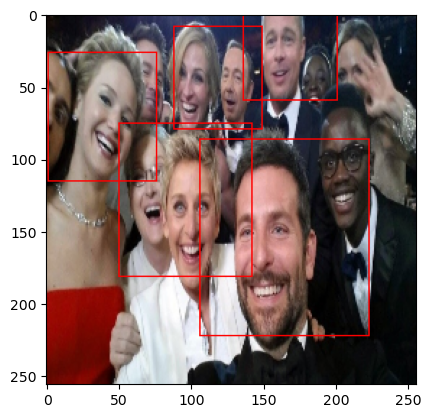

In [19]:
# Enter anything between 0 and 3349
show_face(3349)

## Finding the mean and sd to normalize the dataset

In [10]:
image_paths = "faceDataset/images/"+data['image_name'].unique()
images = []
for img_path in image_paths:
    img =cv2.imread(img_path)
    img = cv2.resize(img, (256, 256)) 
    images.append(img)
images = np.array(images)
print(images)

# Compute the mean and standard deviation
mean = np.mean(images, axis=(0, 1, 2))
std = np.std(images, axis=(0, 1, 2))

# Normalize the dataset
images_normalized = (images - mean) / std

[[[[201 218 244]
   [201 218 244]
   [202 219 245]
   ...
   [201 218 244]
   [201 218 244]
   [202 217 243]]

  [[201 218 244]
   [201 218 244]
   [202 219 245]
   ...
   [201 218 244]
   [201 218 244]
   [201 218 244]]

  [[202 219 245]
   [202 219 245]
   [202 219 245]
   ...
   [201 218 244]
   [201 218 244]
   [202 219 245]]

  ...

  [[213 229 252]
   [213 229 252]
   [213 229 252]
   ...
   [213 229 252]
   [213 229 252]
   [214 230 253]]

  [[213 229 252]
   [213 229 252]
   [213 229 252]
   ...
   [213 229 252]
   [213 229 252]
   [214 230 253]]

  [[213 229 252]
   [213 229 252]
   [213 229 252]
   ...
   [213 229 252]
   [213 229 252]
   [214 230 253]]]


 [[[204  76   1]
   [204  76   1]
   [202  74   0]
   ...
   [162  52   0]
   [165  53   1]
   [165  53   1]]

  [[204  76   1]
   [204  76   1]
   [204  76   1]
   ...
   [162  52   0]
   [165  53   1]
   [165  53   1]]

  [[204  76   1]
   [202  74   0]
   [204  76   1]
   ...
   [162  52   0]
   [164  52   0]
   [166  54

In [11]:
print(mean, std)

[124.97580658 135.03104654 143.95509795] [81.25266682 78.37629708 80.70020808]


# Start building the model

In [12]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


c:\Users\alanm\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
# Split the dataset into training and validation sets
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

# Define the model architecture
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(4, activation='sigmoid')(x)  # 4 values for the bounding box coordinates (x0, y0, x1, y1)
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [14]:
# Define the image data generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,  # Random rotation between -10 and 10 degrees
    width_shift_range=0.1,  # Random shift of the width by 10%
    height_shift_range=0.1,  # Random shift of the height by 10%
    shear_range=0.1,  # Random shear between -10 and 10 degrees
    zoom_range=0.1,  # Random zoom between 0.9 and 1.1
    horizontal_flip=True,  # Random horizontal flip
    vertical_flip=False  # No vertical flip
)

val_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale the validation images

# Set the batch size and target image size
batch_size = 32
target_size = (224, 224)

# Create the train and validation generators
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory='faceDataset/images',  # Set the path to the directory containing the images
    x_col='image_name',
    y_col=['x0', 'y0', 'x1', 'y1'],
    target_size=target_size,
    batch_size=batch_size,
    class_mode='other'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='faceDataset/images',  # Set the path to the directory containing the images
    x_col='image_name',
    y_col=['x0', 'y0', 'x1', 'y1'],
    target_size=target_size,
    batch_size=batch_size,
    class_mode='other'
)

# Define the number of training and validation steps per epoch
train_steps_per_epoch = train_generator.n // batch_size
val_steps_per_epoch = val_generator.n // batch_size

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_steps_per_epoch,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_steps_per_epoch
)

# Evaluate the model
model.evaluate(val_generator, steps=val_steps_per_epoch)

Found 2680 validated image filenames.
Found 670 validated image filenames.
Epoch 1/10


c:\Users\alanm\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


28/83 ━━━━━━━━━━━━━━━━━━━━ 2:11 2s/step - loss: 285825.6250

KeyboardInterrupt: 

In [ ]:
model.save('face_detection_model.h5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the trained model
model = load_model('face_detection_model.h5')

# Load and preprocess a new image
image_path = 'faceDataset/images/00002954.jpg'
image = load_img(image_path, target_size=(224, 224))
image_array = img_to_array(image) / 255.0
image_array = np.expand_dims(image_array, axis=0)

# Make predictions
predictions = model.predict(image_array)

# Extract the predicted bounding box coordinates
x0, y0, x1, y1 = predictions[0]

# Print the predicted bounding box coordinates
print('Bounding Box 1:')
print('x0:', x0)
print('y0:', y0)
print('x1:', x1)
print('y1:', y1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Bounding Box 1:
x0: 1.0
y0: 1.0
x1: 1.0
y1: 1.0
